# ABS AcmeAir

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

Define some constant for plots

## Data Manipulation

In [13]:
data_folder = 'data/'

n_run = sum(1 for item in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, item)))   
data_files = ['run' + str(i+1) + ".txt" for i in range(0,n_run)]
target_cols = ['Response', '#Users', '#Instances']
target_labels = ['Throughput (req/s)', '#Users', '#Instances']
save_labels = ['throughput', 'users', 'instances']
steps = [50, 10, 200]
cols = [1,3,5,7,9]
column_names = ['Time (s)', 'Request', 'Response', '#Users', '#Instances']
dfs = []
for file in data_files:
    df = pd.read_csv(
        data_folder + file, 
        delim_whitespace=True,
        names=column_names,
        usecols=cols,
        skiprows=[])
    df['#Instances'] = [int(element[:-1]) for element in df['#Instances']]
    dfs.append(df)

# Concatenate DataFrames vertically
concatenated_df = pd.concat(dfs)

# Group by index and calculate the mean
average_df = concatenated_df.groupby(level=0).mean()

average_df


,Time (s),Request,Response,#Users,#Instances
0,0.0,0.000000,0.000000,0.0,9.000000
1,5.0,0.000000,0.000000,39.0,9.000000
2,10.0,12.017391,4.391304,43.0,9.000000
3,15.0,13.678261,7.808696,46.0,15.478261
4,20.0,18.547826,12.791304,50.0,19.478261
...,...,...,...,...,...
396,1980.0,8.956522,8.565217,20.0,13.173913
397,1985.0,9.791304,9.365217,24.0,13.956522
398,1990.0,11.826087,10.730435,27.0,15.521739
399,1995.0,13.408696,12.243478,31.0,16.956522


## Plot Data

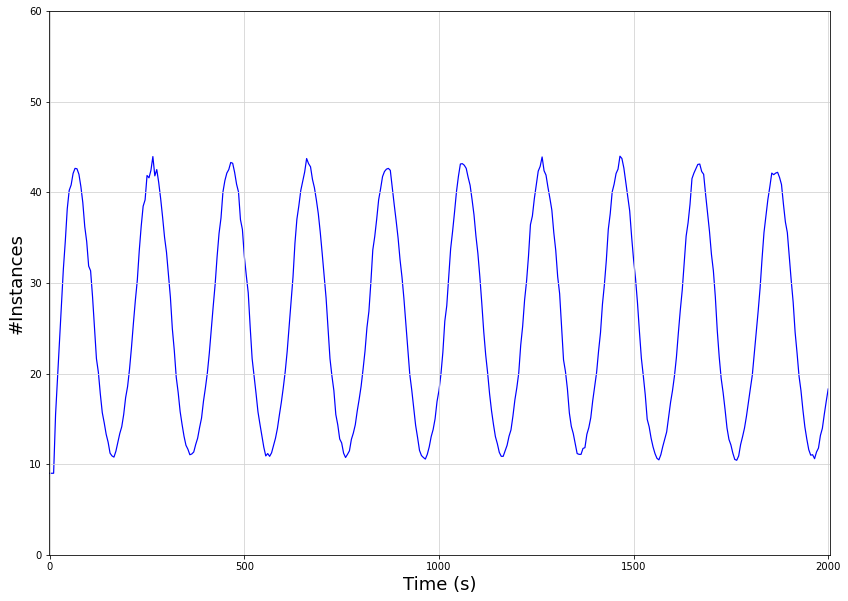

In [16]:
target_index = 2
save_label = save_labels[target_index]

x = average_df['Time (s)']
y = average_df[target_cols[target_index]]
fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax.grid(True)
plt.grid(True, color='lightgray')
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

#define plots
p = ax.plot(x, 
           y, 
           linestyle='solid', 
           color='blue',
           linewidth=1.2,
           label=target_labels[target_index],
           zorder=1,
           alpha=1
           )

up, down, step = 0,0,0
if target_cols[target_index] == '#Users':
    up = 80
    step = 20
elif target_cols[target_index] == 'Response':
    up = 30
    step = 10
elif target_cols[target_index] == '#Instances':
    up = 60
    step = 10

# set axis limits
ax.set_yscale('linear')
ax.set_xlim(-2, int(max(x)) + 5)
ax.set_ylim(down, up)
ax.set_yticks(range(0, up+1, step))

# set ticks and labels
ax.set_ylabel(target_labels[target_index], fontsize=18)
ax.set_xlabel('Time (s)', fontsize=18)
ax.set_xticks(range(0, int(max(x)) + 500, 500))

# legend settings
#ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)

fig.savefig(f'../../phd-thesis/figures/{save_label}.pdf', dpi=300, format='pdf', bbox_inches='tight')
